LOAD LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
import scipy.stats

LINEAR REGRESSION CLASS

In [ ]:
class LinearRegression:

    def __init__(self, ):
        self.weights = None # Weights of each input parameter
        self.bias = None # Bias
        self.n_samples = None
        self.n_features = None

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)

        # Calculation of weights and bias according to the least squares method
        self.weights[0] = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X)) ** 2)
        self.bias = np.mean(y) - self.weights[0] * np.mean(X)

        self.plot_line(X, y)

    def plot_line(self, X, y):
        y_pred = self.predict(X)

        plt.figure(figsize = (9, 9))
        
        plt.scatter(X, y, color = 'blue')
        plt.plot(X, y_pred, color = 'black')

        plt.tick_params(axis='x', which='major', labelsize=19)
        plt.tick_params(axis='y', which='major', labelsize=19)
        plt.xlabel('Wavespeed (m/s)', labelpad = 6, fontsize = 22)
        plt.ylabel('Porosity (%)', labelpad = 6, fontsize = 22)
        plt.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)

        plt.show()

    def predict(self, X):
        # Use of the linear regression model to make predictions
        y_pred = np.dot(X, self.weights) + self.bias
        y_pred = y_pred.reshape(-1, 1)
        
        return y_pred

    def RSS(self, X, y):
        y_pred = self.predict(X)
        RSS = np.sum((y - y_pred) ** 2)

        return RSS

    def TSS(self, y):
        TSS = np.sum((y - np.mean(y)) ** 2)
        
        return TSS
    
    def R2score(self, X, y):
        RSS = self.RSS(X, y)
        TSS = self.TSS(y)
        R2score = 1 - RSS / TSS
        
        return R2score

    def confidence_int(self, X, y):
        # Calculation of confidence intervals
        dofs = self.n_samples - 2
        RSS = self.RSS(X, y)
        RSE = np.sqrt(RSS / (dofs))
        SE = np.sqrt(RSE ** 2 / np.sum((X - np.mean(X)) ** 2))

        print("There is 95% propability that b1 will be in the interval [", self.weights[0] - 2 * SE,", ",self.weights[0] + 2 * SE, "].")
        
        # Calculation of p-value
        a = 0.05 # Level of significance
        t_stat = self.weights[0]  / SE
        pValue = scipy.stats.t.sf(abs(t_stat), df=dofs)

        if pValue > a:
          print("Null hypothesis cannot be rejected since p-value is ", pValue," which is above the significance level ",a)
        else:
          print("Null hypothesis can be rejected since p-value is ", pValue," which is below the significance level ",a)  

        return SE, pValue

MOUNT DRIVE

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


LOAD DATA

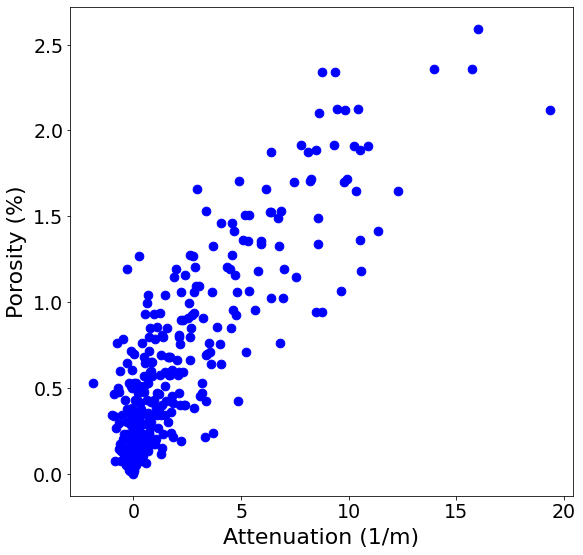

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/ESC597/Linear regression/'

data = np.loadtxt('{}data.txt'.format(path))
X = data[:, 1]
X = X.reshape(-1, 1)

info = np.loadtxt('{}info.txt'.format(path))
y = info
y = y.reshape(-1, 1)


plt.figure(figsize = (9, 9))
plt.scatter(X, y, color = 'blue', s = 75)
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('Attenuation (1/m)', labelpad = 6, fontsize = 22)
plt.ylabel('Porosity (%)', labelpad = 6, fontsize = 22)
plt.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)

SPLIT THE DATA IN TRAINING AND TESTING DATASETS

In [ ]:
seed = 1234 #Define random seed for the shuffling of data
test_size = 0.2 #Define the percentage of testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, shuffle=True)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

INITIALIZE LINEAR REGRESSION MODEL 

In [ ]:
model = LinearRegression()

FIT THE LINEAR REGRESSION MODEL

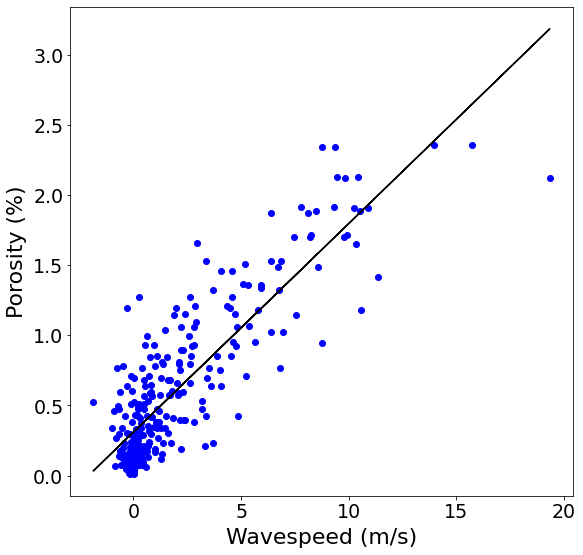

In [ ]:
model.fit(X_train, y_train)

PREDICT USING THE TESTING DATASET

In [ ]:
y_pred_test = model.predict(X_test)

PLOT TRAINING AND TESTING DATA WITH THE PREDICTED LINE

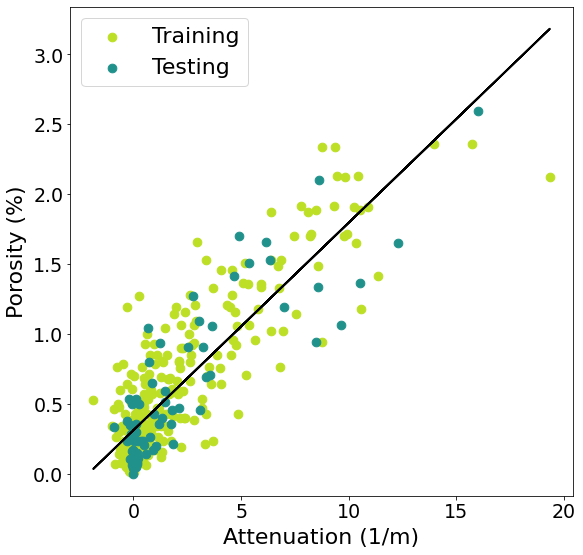

In [ ]:
y_pred_line = model.predict(X)

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(9,9))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=75, label = 'Training')
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=75, label = 'Testing')
plt.plot(X, y_pred_line, color='black', linewidth=2)
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('Attenuation (1/m)', labelpad = 6, fontsize = 22)
plt.ylabel('Porosity (%)', labelpad = 6, fontsize = 22)
plt.legend(fontsize = 22)
plt.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)
plt.show()

CALCULATE R2 SCORE FOR TRAINING AND TESTING

In [ ]:
R2score_train = model.R2score(X_train, y_train)
R2score_test = model.R2score(X_test, y_test)

print("The R2-score for training is ", R2score_train)
print("The R2-score for testing is ", R2score_test)

The R2-score for training is  0.7313388876499667
The R2-score for testing is  0.7337313095703459


CALCULATE RSS FOR TRAINING AND TESTING

In [ ]:
RSS_train = model.RSS(X_train, y_train)
RSS_test = model.RSS(X_test, y_test)

print("The RSS for training is ", RSS_train)
print("The RSS for testing is ", RSS_test)

The RMSE for training is  23.495101748200128
The RMSE for testing is  5.839779143909987


CALCULATE THE p-VALUE TO FOR THE NULL HYPOTHESIS (H0)

In [ ]:
SE, pValue = model.confidence_int(X_train, y_train)

There is 95% propability that b1 will be in the interval [ 0.13777559150704677 ,  0.15937958129320068 ].
Null hypothesis can be rejected since p-value is  1.2744952614919046e-81  which is below the significance level  0.05
